<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/quickstart.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# FiftyOne Quickstart

Hello there! This notebook provides a brief walkthrough of [FiftyOne](https://voxel51.com/docs/fiftyone), highlighting features that will help you build better datasets and computer vision models.

We'll cover the following concepts:

- Loading a dataset [into FiftyOne](https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/index.html)
- Using FiftyOne [in a notebook](https://voxel51.com/docs/fiftyone/environments/index.html#notebooks)
- Using [views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html) and [the App](https://voxel51.com/docs/fiftyone/user_guide/app.html) to explore different aspects of your dataset
- [Evaluating](https://voxel51.com/docs/fiftyone/user_guide/evaluation.html) your model's predictions
- [Finding label mistakes](https://voxel51.com/docs/fiftyone/user_guide/brain.html#label-mistakes) in your datasets

## Install FiftyOne


In [ ]:
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

If you're running this in Google Colab (or any other Ubuntu 22.04 machine), you'll also need to install:

In [ ]:
!pip install fiftyone-db==0.4.3

  Preparing metadata (setup.py) ... done
Reason for being yanked: <none given>
  Created wheel for fiftyone-db: filename=fiftyone_db-0.4.3-py3-none-manylinux1_x86_64.whl size=42156167 sha256=7450b0feef6d64055ccc5a8ce81b382528c2cea95e77fb712552d86b542f73d4
  Stored in directory: /root/.cache/pip/wheels/e4/18/39/48bc12e175272e14b2c3cc30fe14a22c1e6c721a289461bf9b
Successfully built fiftyone-db
  Attempting uninstall: fiftyone-db
    Found existing installation: fiftyone-db 1.1
    Uninstalling fiftyone-db-1.1:
      Successfully uninstalled fiftyone-db-1.1


## Load a dataset

Let's get started by importing the FiftyOne library:

In [ ]:
from collections import defaultdict

import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2


Debido al peso del Dataset COCO se hizo uso de la herramienta "load_zoo_dataset" para limitar el dataset a los objetos necesarios como es vaso, laptop y persona. Y solo tomando las etiquetas de para entrenar el modelo de segmentación. Se descarga el modelo en el directorio en el cual se guarda y se carga en Roboflow para obtener las etiquetas que se necesitan. El dataset se en cuentra dividido en 'train' y 'valid' con las etiquetas guardadas en mascaras de imagen en formato .png.

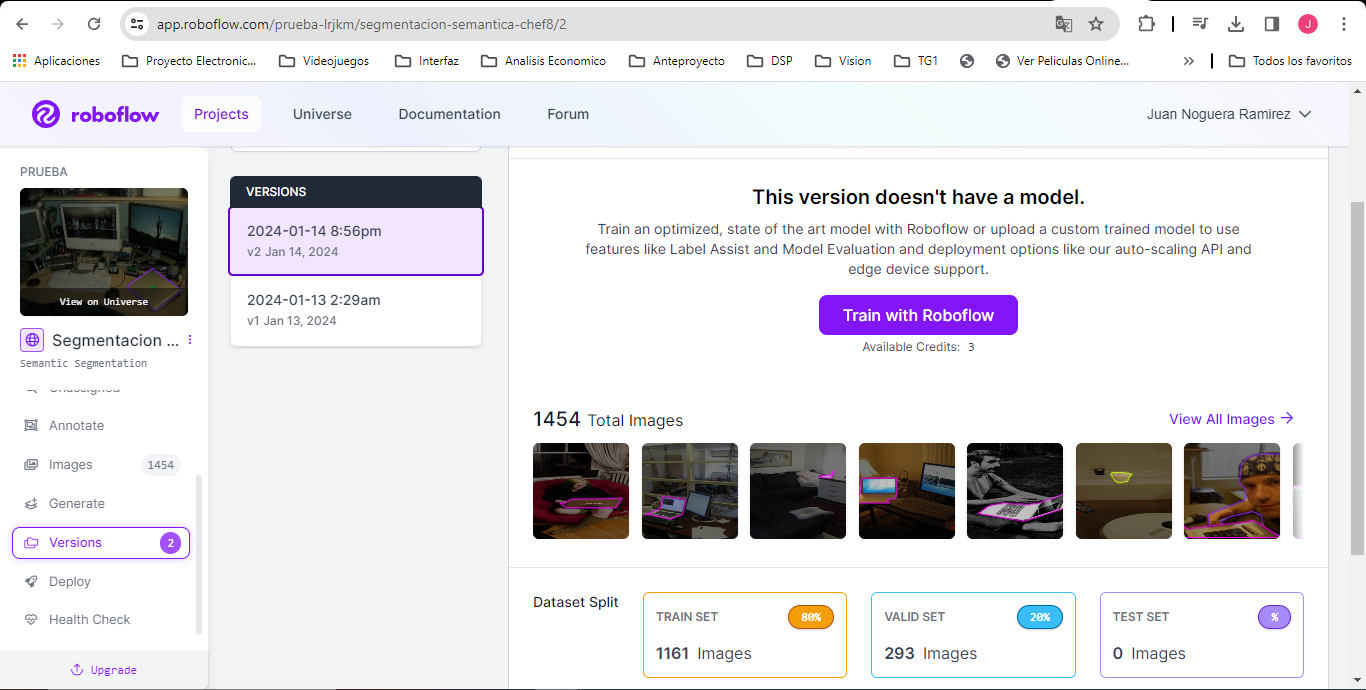

In [ ]:

labels_file = r"/content/coco/"
dataset = fo.zoo.load_zoo_dataset(
    "coco-2017",
    splits=['train'],
    label_types=["segmentations"],
    labels_path =labels_file,
    classes=["cup","laptop", "person"],
    max_samples=600,
)

Debido a que el dataset estaba desbalanceado faltando imagenes de laptops se procede hacer lo anterior pero solo tomando el objeto requerido y añadiendolo al Dataset elegido. Ahora el dataset esta balanceado con las imagenes a continuación.
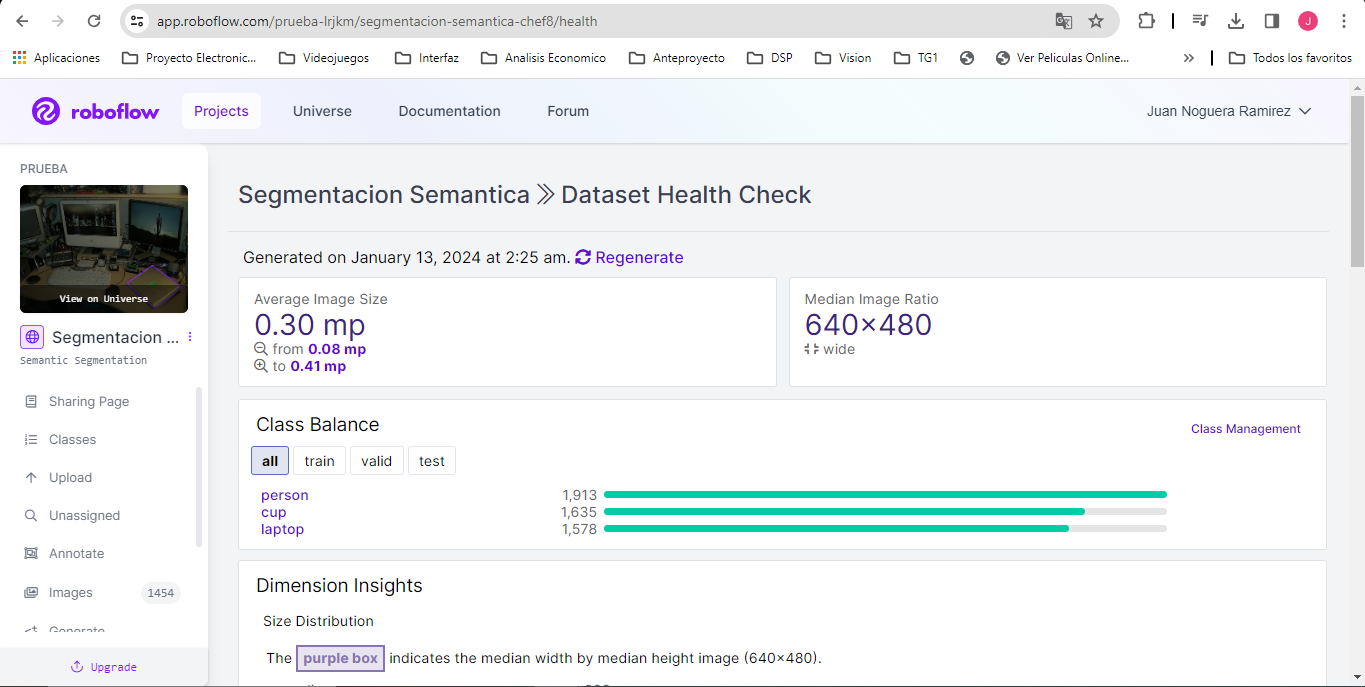

In [ ]:
labels_file = r"/content/coco/"
dataset = fo.zoo.load_zoo_dataset(
    "coco-2017",
    splits=['train'],
    label_types=["segmentations"],
    labels_path =labels_file,
    classes=["laptop"],
    max_samples=600,
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 760.3Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 760.3Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 600 images


 100% |██████████████████| 600/600 [26.8s elapsed, 0s remaining, 21.5 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 600/600 [26.8s elapsed, 0s remaining, 21.5 images/s]      


Writing annotations for 600 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 600 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████████| 0/0 [7.4ms elapsed, ? remaining, ? samples/s]  


INFO:eta.core.utils: 100% |█████████████████████| 0/0 [7.4ms elapsed, ? remaining, ? samples/s]  


Dataset 'coco-2017-train-600' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-600' created


Para descargar el Dataset se comprime en formato .tar.gz

In [ ]:
!tar -zcvf Dataset.tar.gz "/root/fiftyone/coco-2017"

tar: Removing leading `/' from member names
/root/fiftyone/coco-2017/
/root/fiftyone/coco-2017/train/
/root/fiftyone/coco-2017/train/data/
/root/fiftyone/coco-2017/train/data/000000027727.jpg
/root/fiftyone/coco-2017/train/data/000000004694.jpg
/root/fiftyone/coco-2017/train/data/000000045374.jpg
/root/fiftyone/coco-2017/train/data/000000002434.jpg
/root/fiftyone/coco-2017/train/data/000000010779.jpg
/root/fiftyone/coco-2017/train/data/000000015165.jpg
/root/fiftyone/coco-2017/train/data/000000062053.jpg
/root/fiftyone/coco-2017/train/data/000000026029.jpg
/root/fiftyone/coco-2017/train/data/000000083651.jpg
/root/fiftyone/coco-2017/train/data/000000066096.jpg
/root/fiftyone/coco-2017/train/data/000000002691.jpg
/root/fiftyone/coco-2017/train/data/000000096223.jpg
/root/fiftyone/coco-2017/train/data/000000048900.jpg
/root/fiftyone/coco-2017/train/data/000000000941.jpg
/root/fiftyone/coco-2017/train/data/000000022953.jpg
/root/fiftyone/coco-2017/train/data/000000096757.jpg
/root/fiftyon